# Stock prediction

In [1]:
import datetime

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import pandas_datareader.data as web

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale

In [2]:
start_date = datetime.datetime(2010,1,1)
end_date = datetime.datetime(2019,9,1);

In [3]:
df = web.DataReader("AMZN", 'yahoo', start_date, end_date)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-26,1770.000000,1743.510010,1766.910034,1768.869995,3080000,1768.869995
2019-08-27,1779.400024,1746.680054,1775.729980,1761.829956,3019700,1761.829956
2019-08-28,1767.859985,1744.050049,1755.000000,1764.250000,2419700,1764.250000
2019-08-29,1798.550049,1777.250000,1783.000000,1786.400024,3015100,1786.400024
2019-08-30,1799.739990,1764.569946,1797.489990,1776.290039,3058700,1776.290039


In [4]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2432.000000,2432.000000,2432.000000,2432.000000,2.432000e+03,2432.000000
mean,644.595247,631.098664,638.371361,638.184149,4.581917e+06,638.184149
std,557.845559,546.605656,552.952728,552.436135,2.884268e+06,552.436135
min,111.290001,105.800003,105.930000,108.610001,9.844000e+05,108.610001
25%,227.380001,221.362495,224.720001,224.052498,2.821800e+06,224.052498
50%,368.589996,359.779999,364.089996,364.250000,3.882200e+06,364.250000
75%,891.134979,878.610016,879.625000,885.137482,5.385050e+06,885.137482
max,2050.500000,2013.000000,2038.109985,2039.510010,4.242110e+07,2039.510010


In [5]:
adjusting_closing_price = df['Adj Close']
moving_average = adjusting_closing_price.rolling(window=100).mean()

## Plot adj closing price with moving average

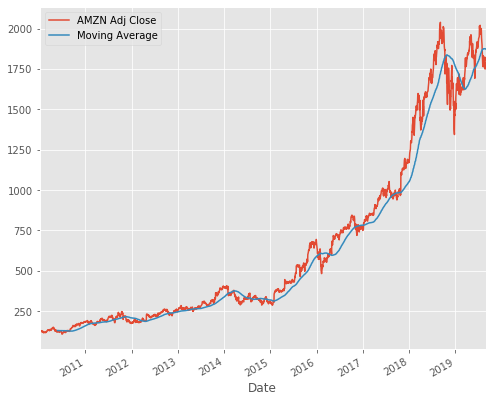

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

adjusting_closing_price.plot(label='AMZN Adj Close')
moving_average.plot(label='Moving Average')
plt.legend()

## Deternminate Risks and Returns

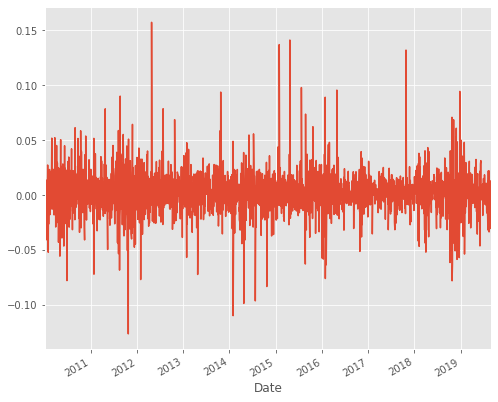

In [7]:
returns = adjusting_closing_price / adjusting_closing_price.shift(1) - 1
returns.plot(label='return')

In [8]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0

In [9]:
import math

# Drop missing value
dfreg.fillna(value=-99999, inplace=True)

# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col]

X = np.array(dfreg.drop(['label'], 1))

# Scale the X so that everyone can have the same distribution for linear regression
X = scale(X)

# Separate label and identify it as y
y = np.array(dfreg['label'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, shuffle=False)

In [11]:
dfreg1 = dfreg
dfreg2 = dfreg

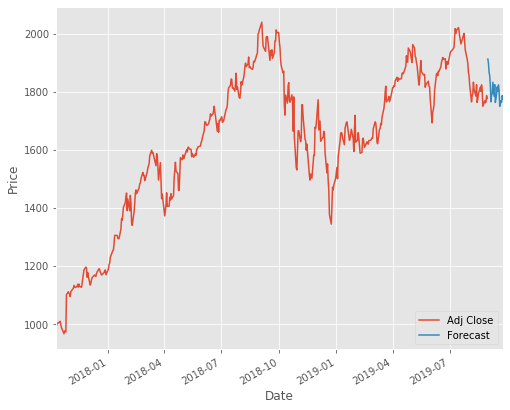

In [11]:
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

linear_regresion_score = clfreg.score(X_test, y_test)
print(f'Linear regression accuracy is:      {linear_regresion_score*100} %')

forecast_set = clfreg.predict(X_test)
dfreg['Forecast'] = np.nan

last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
    
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()

plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

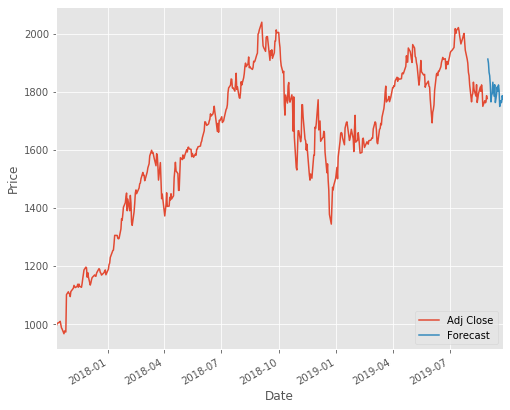

In [12]:
# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

quadratic_regresion_2_score = clfpoly2.score(X_test,y_test)
print(f'Quadratic Regression 2 accuracy is: {quadratic_regresion_2_score*100} %')

forecast_set1 = clfpoly2.predict(X_test)
dfreg1['Forecast'] = np.nan

last_date1 = dfreg1.iloc[-1].name
last_unix1 = last_date1
next_unix1 = last_unix1 + datetime.timedelta(days=1)

for i in forecast_set1:
    next_date1 = next_unix1
    next_unix1 += datetime.timedelta(days=1)
    dfreg1.loc[next_date1] = [np.nan for _ in range(len(dfreg1.columns)-1)]+[i]
    
dfreg1['Adj Close'].tail(500).plot()
dfreg1['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

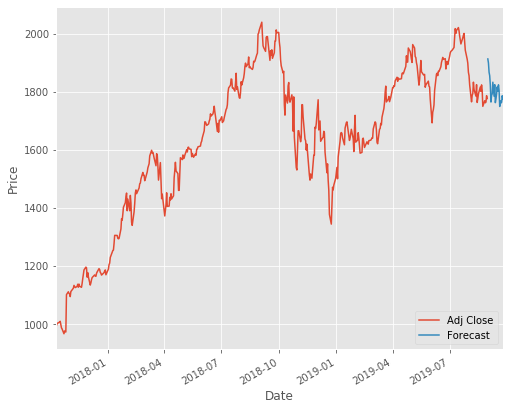

In [12]:
# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train);

quadratic_regresion_3_score = clfpoly3.score(X_test,y_test)
print(f'Quadratic Regression 3 accuracy is: {quadratic_regresion_3_score*100} %')

forecast_set2 = clfpoly3.predict(X_test)
dfreg2['Forecast'] = np.nan

last_date2 = dfreg2.iloc[-1].name
last_unix2 = last_date2
next_unix2 = last_unix2 + datetime.timedelta(days=1)

for i in forecast_set2:
    next_date2 = next_unix2
    next_unix2 += datetime.timedelta(days=1)
    dfreg2.loc[next_date2] = [np.nan for _ in range(len(dfreg2.columns)-1)]+[i]
    
dfreg2['Adj Close'].tail(500).plot()
dfreg2['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()